# EXERCICE 2
In this part, we will create a neural network capable of identifying whether a grayscale image of size 28 × 28
is a handwritten digit or not.

In [1]:
#First of all, we install the packages which we are going to work with...
from PIL import Image
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import pylab as plb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import seaborn as sns 
import itertools

## First of all we generate “random” 28 × 28 grayscale images 
To do this we will generate “random” 28 × 28 grayscale images using a function(numpy.random and matplotlib imshow function) in Python that generates an image in which the pixel values are obtained by using a uniform distribution(rand function).

In [2]:
# Random generation of pixels uniformly distributed with rand...
n=30000
m=10000
r_x_train=np.random.rand(28*28*n).reshape((n, 28, 28, 1))
r_x_test=np.random.rand(28*28*m).reshape((m, 28, 28, 1))

#Creating r_y training and testing sample
r_y_train= np.zeros(30000)
r_y_test= np.zeros(10000)

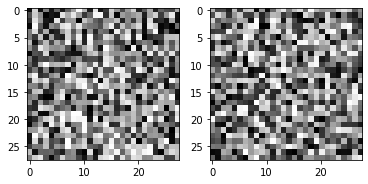

In [3]:
#Verifying...
 #The train sample
plt.subplot(121)
plt.imshow(r_x_train[102,:,:],cmap='gray',interpolation='nearest')

#The test sample
plt.subplot(122)
plt.imshow(r_x_test[100,:,:],cmap='gray',interpolation='nearest')
plt.show()

##  Importing Mnist database
Here we will load first the MNIST database from keras, then we will reshape the dataset and choose randomly the number of observations that we need.


In [4]:
#loading data Mnist...
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [5]:
#Trainning and testing shape
print('Training data dimensions: ',x_train.shape, )
print('Test data dimensions: ', x_test.shape, )

Training data dimensions:  (60000, 28, 28)
Test data dimensions:  (10000, 28, 28)


In [6]:
#Now we expand our array of x_test and x_train to give space to our new observation
x_train=np.expand_dims(x_train, -1)
x_test=np.expand_dims(x_test, -1)

In [7]:
#We draw our 30000 observations from Mnist database
x_train=x_train[np.random.choice(x_train.shape[0], n, replace="False")]

#Creating y training and testing sample
y_train=np.ones(30000)
y_test=np.ones(10000)

## Here we create a new sample with our mnist observations and the new one draw randomly

In [8]:
# Now we create a new sample with our mnist observations and the new one draw randomly

X_train=np.concatenate((x_train, r_x_train))
Y_train=np.concatenate((y_train, r_y_train))

X_test=np.concatenate((x_test, r_x_test))
Y_test=np.concatenate((y_test, r_y_test))

#We reshape our y_train and y_test data
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)


## Proposing an architecture for the network


In [9]:
# Here we create our model for handwrite detecting
model_C=keras.models.Sequential()
model_C.add(keras.Input(shape=(28,28,1)))
model_C.add(keras.layers.Conv2D(64, (3,3), strides=(2, 2)))
model_C.add(keras.layers.Dropout(0.5))
model_C.add(keras.layers.Flatten())
model_C.add(keras.layers.Dense(2, activation="sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_C.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 64)        640       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 21634     
Total params: 22,274
Trainable params: 22,274
Non-trainable params: 0
_________________________________________________________________


###  Illustrate the implemented architectures with text and a diagram.


In [10]:
keras.utils.plot_model(model_C, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Trainning our Model_C

In [11]:
#Firt we compile our model
model_C.compile(loss="binary_crossentropy", optimizer=opt, metrics="accuracy")
#Then we train the model(we train it 5 times in this case)
model_C.fit(X_test, Y_test, epochs=5)

Epoch 1/5
625/625 [==============================] - 5s 8ms/step - loss: 0.1319 - accuracy: 0.9866
Epoch 2/5
625/625 [==============================] - 5s 8ms/step - loss: 0.0035 - accuracy: 0.9999
Epoch 3/5
625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 5s 8ms/step - loss: 6.9994e-04 - accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 5s 8ms/step - loss: 2.4185e-04 - accuracy: 1.0000


### Evaluate the classifier’s performance using the 10, 000 MNIST test images and 10, 000 randomly generated images

In [12]:
score=model_C.evaluate(X_test,Y_test,verbose=1)
print("test loss:", score[0])
print("test accuracy:", score[1])

625/625 [==============================] - 1s 2ms/step - loss: 1.6366e-04 - accuracy: 1.0000
test loss: 0.00016366071940865368
test accuracy: 1.0


###  Propose a vizualization of the classifier’s predictions.
First we create our predicted function named here y_pred_C.
Then we use a random function in order to predict the class of some images from our data.
The image number is draw randomly.

In [13]:
#prediction 
y_pred_prob_C = model_C.predict(X_test)
y_pred_C = np.argmax(y_pred_prob_C, axis=1)


CNN model prediction for image number 5141: PRESENCE OF DIGIT 
With predicted probability : [0. 1.]


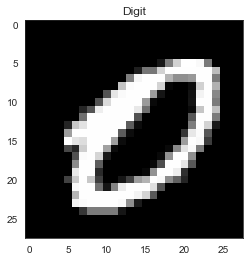

In [14]:
#random choice of the image number i
i=np.random.randint(1,20000)

sns.set_style("white")
plt.imshow(X_test[i,:,:], cmap='gray')

if y_pred_C[i]==1: 
    print(f'CNN model prediction for image number {i}: PRESENCE OF DIGIT \nWith predicted probability : {y_pred_prob_C[i]}')
else:
    print(f'CNN model prediction for image number {i} : NON PRESENCE OF DIGIT \nWith predicted probability : {y_pred_prob_C[i]}')
    
if np.argmax(Y_test[i])==1:
    plt.title("Digit")
else:
    plt.title("Non Digit")
    

###  Here we allow you to vizualize the prediction on a specific list of images of your choice....
 Firt you have to choose a list of 4 number separed by space:
 You have to choose 2 number between 1:10000 in the first part and 2 number between 10001:20000.
 
 We specify this interval cause we concatenate our data. So to vizualise the prediction on images from MNIST the interval is 1:10000; And 10001:20000 for the random grayscale images prediction.
        

choose your image number

Enter four value: 3 8 5 7

CNN model prediction  for image number 3: PRESENCE OF DIGIT 
With predicted probability : [0. 1.]

CNN model prediction  for image number 8: PRESENCE OF DIGIT 
With predicted probability : [0. 1.]

CNN model prediction  for image number 5: PRESENCE OF DIGIT 
With predicted probability : [0. 1.]

CNN model prediction  for image number 7: PRESENCE OF DIGIT 
With predicted probability : [0. 1.]


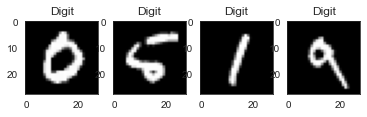

In [24]:
print("choose your image number\n")
num1, num2,num3,num4 = [int(ele) for ele in input("Enter four value: ").split()]
list=[num1, num2,num3,num4]

for i in list:
    "\n"
    plt.subplot(1,4,0+1+list.index(i))
    sns.set_style("white")
    plt.imshow(X_test[i,:,:], cmap='gray')
    if y_pred_C[i]==1: 
        print(f'\nCNN model prediction  for image number {i}: PRESENCE OF DIGIT \nWith predicted probability : {y_pred_prob_C[i]}')
    else:
        print(f'\nCNN model prediction  for image number {i}: NON PRESENCE OF DIGITT \nWith predicted probability : {y_pred_prob_C[i]}')

    if np.argmax(Y_test[i])==1:
        plt.title("Digit")
    else:
        plt.title("Non Digit")


## Confusion matrix

In [20]:
#First we create a new y_test sample by reducing our data dimension
y_test_copy = np.argmax(Y_test,axis = 1)
#Then we compute the confusion matrix named here cfm function123
cfm = confusion_matrix(y_test_copy,y_pred_C,labels=np.arange(0,2).tolist())

In [21]:
#Here we write a function who can be able to plot our confusion matrix
def plot_confusion_matrix(cfm,target_names,title='Confusion matrix',cmap=None,normalize=True,color='Reds'):
    accuracy = np.trace(cfm) / np.sum(cfm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap(color)

    plt.figure(figsize=(8, 6))
    plt.imshow(cfm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cfm = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]


    thresh = cfm.max() / 1.5 if normalize else cfm.max() / 2
    for i, j in itertools.product(range(cfm.shape[0]), range(cfm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cfm[i, j]),
                     horizontalalignment="center",
                     color="white" if cfm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cfm[i, j]),
                     horizontalalignment="center",
                     color="white" if cfm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

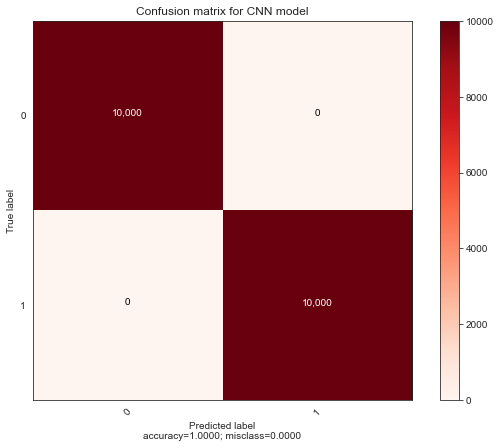

In [22]:
#Now we plot our confusion matrix
plot_confusion_matrix(cfm,np.arange(0,2).tolist(),
                          title= 'Confusion matrix for CNN model',
                          cmap=None,
                          normalize=False,color='Reds')